In [10]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import csv 
from matplotlib.lines import Line2D


%matplotlib inline

In [32]:
def format():
    plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
    plt.xscale('log')
    plt.yscale('log')
    plt.figure(figsize=(6,6))
    return

In [23]:
sample_primordial = pd.read_csv('all_planets.csv')

sample_primordial.describe()


,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_angsep,pl_angseperr1,pl_angseperr2,pl_angseplim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_dens,pl_denserr1,pl_denserr2,pl_denslim,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_orbincllim,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranmidlim,ttv_flag,pl_imppar,pl_impparerr1,pl_impparerr2,pl_impparlim,pl_trandep,pl_trandeperr1,pl_trandeperr2,pl_trandeplim,pl_trandur,pl_trandurerr1,pl_trandurerr2,pl_trandurlim,pl_ratdor,pl_ratdorerr1,pl_ratdorerr2,pl_ratdorlim,pl_ratror,pl_ratrorerr1,pl_ratrorerr2,pl_ratrorlim,pl_occdep,pl_occdeperr1,pl_occdeperr2,pl_occdeplim,pl_orbtper,pl_orbtpererr1,pl_orbtpererr2,pl_orbtperlim,pl_orblper,pl_orblpererr1,pl_orblpererr2,pl_orblperlim,pl_rvamp,pl_rvamperr1,pl_rvamperr2,pl_rvamplim,pl_projobliq,pl_projobliqerr1,pl_projobliqerr2,pl_projobliqlim,pl_trueobliq,pl_trueobliqerr1,pl_trueobliqerr2,pl_trueobliqlim,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_lum,st_lumerr1,st_lumerr2,st_lumlim,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_age,st_ageerr1,st_ageerr2,st_agelim,st_dens,st_denserr1,st_denserr2,st_denslim,st_vsin,st_vsinerr1,st_vsinerr2,st_vsinlim,st_rotp,st_rotperr1,st_rotperr2,st_rotplim,st_radv,st_radverr1,st_radverr2,st_radvlim,ra,dec,glat,glon,elat,elon,sy_pm,sy_pmerr1,sy_pmerr2,sy_pmra,sy_pmraerr1,sy_pmraerr2,sy_pmdec,sy_pmdecerr1,sy_pmdecerr2,sy_dist,sy_disterr1,sy_disterr2,sy_plx,sy_plxerr1,sy_plxerr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
count,5756.000000,5756.000000,5756.000000,5756.000000,5.480000e+03,4.979000e+03,4.979000e+03,5480.000000,5475.000000,2863.000000,2863.000000,5476.000000,5448.000000,0.0,0.0,5448.0,5735.000000,3978.000000,3978.000000,5735.000000,5734.000000,3907.000000,3907.000000,5734.000000,5733.000000,2647.000000,2647.000000,5733.000000,5733.000000,2647.000000,2647.000000,5733.000000,5651.000000,1127.000000,1127.000000,5651.000000,4934.000000,1669.000000,1669.000000,4934.000000,4015.000000,3404.000000,3404.000000,4015.0,4275.000000,1527.000000,1527.000000,4275.000000,4348.000000,1789.000000,1791.000000,4348.000000,4.563000e+03,4504.000000,4504.000000,4563.0,5756.000000,4159.00000,4098.000000,4098.000000,4159.000000,4141.000000,4024.000000,4024.000000,4141.000000,4235.000000,4128.000000,4128.000000,4235.0,4007.000000,3996.000000,3996.000000,4007.000000,4211.000000,4164.000000,4164.000000,4211.0,32.000000,30.000000,30.000000,32.000000,9.980000e+02,970.000000,970.000000,998.0,1780.00000,1562.000000,1562.000000,1850.0,2216.000000,2137.000000,2137.000000,2216.000000,172.000000,170.000000,170.000000,172.000000,34.000000,29.000000,29.000000,34.000000,5517.000000,5318.000000,5294.000000,5517.000000,5495.000000,5332.000000,5314.000000,5495.0,5749.00000,5471.000000,5450.000000,5749.0,5284.000000,4984.000000,4984.000000,5284.000000,5501.000000,3362.000000,3345.000000,5501.0,5489.000000,5307.000000,5307.000000,5489.000000,4519.000000,4267.000000,4267.000000,4614.000000,5236.000000,5105.000000,5105.000000,5236.0,2048.000000,1406.000000,1390.000000,2048.000000,706.000000,564.000000,564.000000,706.000000,2265.000000,2211.000000,2171.000000,2265.000000,5756.000000,5756.000000,5756.000000,5756.000000,5756.000000,5756.000000,5506.000000,5503.000000,5490.000000,5506.000000,5503.000000,5490.000000,5506.000000,5503.000000,5490.000000,5731.000000,5625.000000,5625.000000,5422.000000,5422.000000,5422.000000,5517.000000,5509.000000,5503.000000,5526.000000,5490.000000,547

### **m sin i x orbital semi-major axis**

In [61]:
plot1 = sample_primordial[sample_primordial['pl_orbsmax'] != 0] #com medida de semi orbit
plot1 = plot1[plot1['pl_bmassj'] != 0]

low_mass =  plot1[plot1['pl_bmassj'] >= 13]
radv_st = low_mass[low_mass['discoverymethod'] == 'Radial Velocity']
trasnit_st = low_mass[low_mass['discoverymethod'] == 'Transit']
micro_st = low_mass[low_mass['discoverymethod'] == 'Microlensing']
imagins_st = low_mass[low_mass['discoverymethod'] == 'Imaging']

plot1 = plot1[plot1['pl_bmassj'] < 13]
radv = plot1[plot1['discoverymethod'] == 'Radial Velocity']
trasnit = plot1[plot1['discoverymethod'] == 'Transit']
micro = plot1[plot1['discoverymethod'] == 'Microlensing']
imagins = plot1[plot1['discoverymethod'] == 'Imaging']

C:\Users\ylana\AppData\Local\Temp\ipykernel_15852\1026915943.py:24: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,10000)


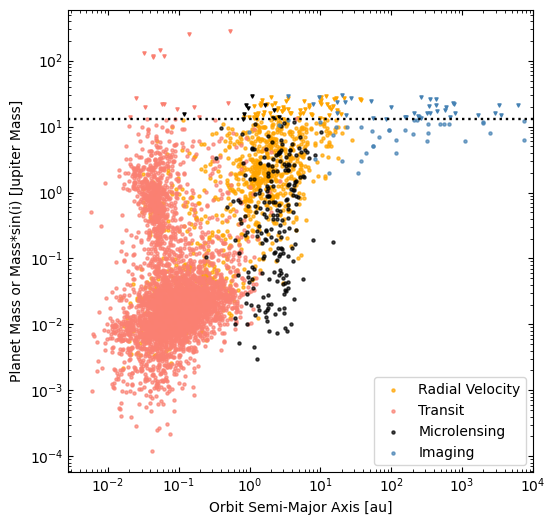

In [80]:
plt.figure(figsize=(6,6))

#plt.scatter(low_mass['pl_orbsmax'], low_mass['pl_bmassj'], s = 1, marker = 'v')
plt.scatter(radv_st['pl_orbsmax'], radv_st['pl_bmassj'], s = 5, marker = 'v', c = 'orange')
plt.scatter(trasnit_st['pl_orbsmax'], trasnit_st['pl_bmassj'], s = 5, marker = 'v', c = 'salmon')
plt.scatter(micro_st['pl_orbsmax'], micro_st['pl_bmassj'], s = 5, marker = 'v', c = 'black')
plt.scatter(imagins_st['pl_orbsmax'], imagins_st['pl_bmassj'], s = 5, marker = 'v', c = 'steelblue')


#plt.scatter(plot1['pl_orbsmax'], plot1['pl_bmassj'], s = 5, marker = 'o')
plt.scatter(radv['pl_orbsmax'], radv['pl_bmassj'], s = 5, marker = 'o', c = 'orange', alpha = 0.7, ec = 'orange', label = 'Radial Velocity')
plt.scatter(trasnit['pl_orbsmax'], trasnit['pl_bmassj'], s = 5, marker = 'o', c = 'salmon', alpha = 0.7, ec = 'salmon', label = 'Transit')
plt.scatter(micro['pl_orbsmax'], micro['pl_bmassj'], s = 5, marker = 'o', c = 'black', alpha = 0.7, ec = 'black', label = 'Microlensing')
plt.scatter(imagins['pl_orbsmax'], imagins['pl_bmassj'], s = 5, marker = 'o', c = 'steelblue', alpha = 0.7, ec = 'steelblue', label = 'Imaging')


plt.hlines(13,0,10000, color = 'black', linestyle = ':', linewidth=1.7)
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Orbit Semi-Major Axis [au]')
plt.ylabel('Planet Mass or Mass*sin(i) [Jupiter Mass]')
plt.xlim(0,10000)
plt.legend()
plt.show()

legenda: dashed line é o limite de queima de hidrogenio. triangulos são o q provavelmente são anas marrom. (log vs log) 

### **distribuição de massa -> histograma**

In [85]:
plot2 = sample_primordial[sample_primordial['pl_bmassj'] != 0]
teste = plot2['pl_bmassj'].dropna()

0       15.4640
1       14.7400
2        3.5590
3        8.0530
4        1.7800
         ...   
5751     0.6876
5752    13.9800
5753    10.2500
5754     0.5100
5755     1.9410
Name: pl_bmassj, Length: 5733, dtype: float64

In [87]:
np.min(plot2['pl_bmassj'])

6e-05

In [86]:
def freedman_diaconis_bins(data):
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    bin_width = 2 * iqr / (len(data) ** (1 / 3))
    return int((np.max(data) - np.min(data)) / bin_width)

# Example usage:
num_bins = freedman_diaconis_bins(plot2['pl_bmassj'])
print("Number of bins (Freedman-Diaconis Rule):", num_bins)

ValueError: cannot convert float NaN to integer

(array([5.719e+03, 7.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([6.00000000e-05, 2.82000540e+01, 5.64000480e+01, 8.46000420e+01,
        1.12800036e+02, 1.41000030e+02, 1.69200024e+02, 1.97400018e+02,
        2.25600012e+02, 2.53800006e+02, 2.82000000e+02]),
 <BarContainer object of 10 artists>)

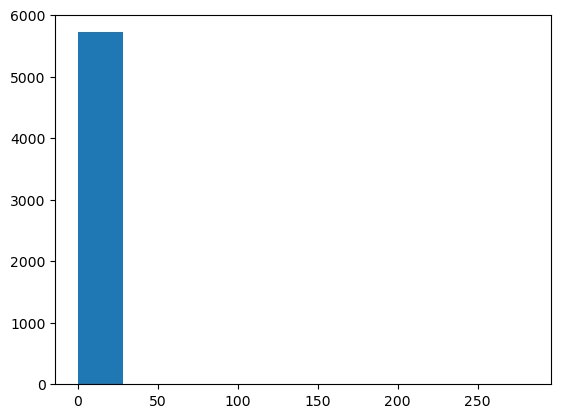

In [82]:
plt.hist(plot2['pl_bmassj'])

Next plots:
- distribição de raio

- distribuição de massa

- eccentricity vs period

- distribuição mettalicities -> comparar as que tem planetas com as que não tem

- loc na galaxia
